In [8]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from turtle import color
from sklearn.linear_model import LinearRegression


**Entire home**

In [9]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('Roma private room.csv')
df.head()

id                                             name  \
0   2737.0                 Elif's room in cozy, clean flat.   
1  21193.0                    BLUE DOUBLE ROOM WITH TERRACE   
2  31464.0  Warm Apartment with a Hi-Fi  and Quaint Balcony   
3  76041.0      Roma - Centro Storico - Trastevere "Ripa18"   
4  47213.0                Sotto il cielo di Roma B&B (Luna)   

                                         description  \
0  10 min by bus you can get to Piazza Venezia or...   
1                                         Indefinido   
2  The WHOLE APARTMENT IS  FOR YOU WITH PRIVATE B...   
3  Definitely worth highlighting the privacy and ...   
4  The room is located in a B&B, en suite bathroo...   

                               neighborhood_overview  host_id host_name  \
0  It used to be an industrial area until late 80...     3047      Elif   
1  Located in a strategic location, a few steps f...    80755  Marianna   
2  The apartment is set in a low-key neighborhood...   135112     Mario   
3                                         Indefinido   405061   Roberto   
4  We are in the San Paolo - Marconi area, univer...   205102   Antonio   

   host_since host_location  host_response_time host_response_rate  ...  \
0  18/09/2008   Rome, Italy      within an hour               100%  ...   
1  13/02/2010   Rome, Italy  within a few hours               100%  ...   
2  30/05/2010   Rome, Italy  within a few hours                80%  ...   
3  22/02/2011   Rome, Italy        within a day               100%  ...   
4  18/08/2010   Rome, Italy  within a few hours               100%  ...   

  neighbourhood_cleansed.1                    property_type.1  \
0         I Centro Storico  Private room in bed and breakfast   
1         I Centro Storico                        Entire loft   
2     II Parioli/Nomentano                       Entire condo   
3         I Centro Storico                 Entire rental unit   
4         I Centro Storico                 Entire rental unit   

       room_type.1  bathrooms_text.1  \
0     Private room    1 private bath   
1  Entire home/apt            1 bath   
2  Entire home/apt            1 bath   
3  Entire home/apt           2 baths   
4  Entire home/apt            1 bath   

                                         amenities.1 has_availability  \
0  ["Cleaning available during stay", "Safe", "Cr...                t   
1  ["Bed linens", "Cooking basics", "Microwave", ...                t   
2  ["Air conditioning", "Crib", "Dedicated worksp...                t   
3  ["Crib", "Dedicated workspace", "Free washer \...                t   
4  ["Dedicated workspace", "Ethernet connection",...                t   

  instant_bookable  host_total_listings_count  review_scores_accuracy  \
0                t                         54                4.791947   
1                t                         41                4.450000   
2                f                          3                4.780000   
3                t                         40                4.030000   
4                f                         11                4.740000   

  host_is_superhost  
0                 f  
1                 f  
2                 t  
3                 f  
4                 f  

[5 rows x 66 columns]

**price vs host_acceptance rate**

In [10]:
df['price'] = df['price'].fillna('0').astype(str)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

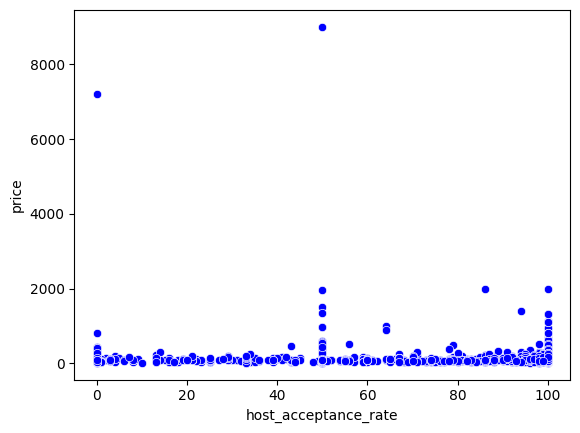

In [11]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

In [12]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Vars_Dep)
model.score(Vars_Indep,Vars_Dep)

7.937592699980289e-05

In [13]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_acceptance_rate', y_pred)
df.head()

Predicciones_host_acceptance_rate       id  \
0                         146.215119   2737.0   
1                         146.297975  21193.0   
2                         138.012406  31464.0   
3                         146.297975  76041.0   
4                         146.297975  47213.0   

                                              name  \
0                 Elif's room in cozy, clean flat.   
1                    BLUE DOUBLE ROOM WITH TERRACE   
2  Warm Apartment with a Hi-Fi  and Quaint Balcony   
3      Roma - Centro Storico - Trastevere "Ripa18"   
4                Sotto il cielo di Roma B&B (Luna)   

                                         description  \
0  10 min by bus you can get to Piazza Venezia or...   
1                                         Indefinido   
2  The WHOLE APARTMENT IS  FOR YOU WITH PRIVATE B...   
3  Definitely worth highlighting the privacy and ...   
4  The room is located in a B&B, en suite bathroo...   

                               neighborhood_overview  host_id host_name  \
0  It used to be an industrial area until late 80...     3047      Elif   
1  Located in a strategic location, a few steps f...    80755  Marianna   
2  The apartment is set in a low-key neighborhood...   135112     Mario   
3                                         Indefinido   405061   Roberto   
4  We are in the San Paolo - Marconi area, univer...   205102   Antonio   

   host_since host_location  host_response_time  ... neighbourhood_cleansed.1  \
0  18/09/2008   Rome, Italy      within an hour  ...         I Centro Storico   
1  13/02/2010   Rome, Italy  within a few hours  ...         I Centro Storico   
2  30/05/2010   Rome, Italy  within a few hours  ...     II Parioli/Nomentano   
3  22/02/2011   Rome, Italy        within a day  ...         I Centro Storico   
4  18/08/2010   Rome, Italy  within a few hours  ...         I Centro Storico   

                     property_type.1      room_type.1 bathrooms_text.1  \
0  Private room in bed and breakfast     Private room   1 private bath   
1                        Entire loft  Entire home/apt           1 bath   
2                       Entire condo  Entire home/apt           1 bath   
3                 Entire rental unit  Entire home/apt          2 baths   
4                 Entire rental unit  Entire home/apt           1 bath   

                                         amenities.1  has_availability  \
0  ["Cleaning available during stay", "Safe", "Cr...                 t   
1  ["Bed linens", "Cooking basics", "Microwave", ...                 t   
2  ["Air conditioning", "Crib", "Dedicated worksp...                 t   
3  ["Crib", "Dedicated workspace", "Free washer \...                 t   
4  ["Dedicated workspace", "Ethernet connection",...                 t   

  instant_bookable host_total_listings_count  review_scores_accuracy  \
0                t                        54                4.791947   
1                t                        41                4.450000   
2                f                         3                4.780000   
3                t                        40                4.030000   
4                f                        11                4.740000   

   host_is_superhost  
0                  f  
1                  f  
2                  t  
3                  f  
4                  f  

[5 rows x 67 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

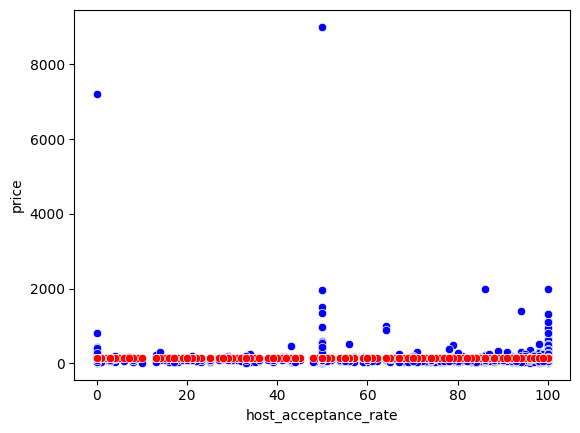

In [14]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_host_acceptance_rate', color="red", data=df)

In [15]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 7.937592699980289e-05
Correlación: 0.008909316864934309


**price vs host_is_superhost**

C:\Users\diego\AppData\Local\Temp\ipykernel_8252\1597296358.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')


<Axes: xlabel='host_is_superhost', ylabel='price'>

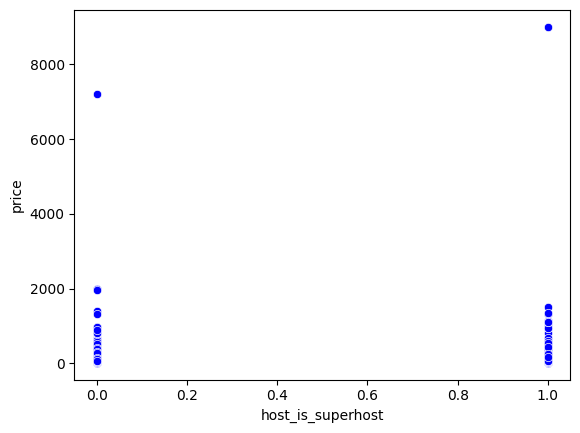

In [16]:
df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False})
df['host_is_superhost'] = df['host_is_superhost'].astype(int)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [17]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model2 = LinearRegression()
model2.fit(X=Vars_Indep, y=Vars_Dep)
model2.score(Vars_Indep,Vars_Dep)

1.0424716238022214e-06

In [18]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model2.predict(X=df[['host_is_superhost']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_is_superhost', y_pred)
df.head()

Predicciones_host_is_superhost  Predicciones_host_acceptance_rate       id  \
0                      139.798295                         146.215119   2737.0   
1                      139.798295                         146.297975  21193.0   
2                      140.395450                         138.012406  31464.0   
3                      139.798295                         146.297975  76041.0   
4                      139.798295                         146.297975  47213.0   

                                              name  \
0                 Elif's room in cozy, clean flat.   
1                    BLUE DOUBLE ROOM WITH TERRACE   
2  Warm Apartment with a Hi-Fi  and Quaint Balcony   
3      Roma - Centro Storico - Trastevere "Ripa18"   
4                Sotto il cielo di Roma B&B (Luna)   

                                         description  \
0  10 min by bus you can get to Piazza Venezia or...   
1                                         Indefinido   
2  The WHOLE APARTMENT IS  FOR YOU WITH PRIVATE B...   
3  Definitely worth highlighting the privacy and ...   
4  The room is located in a B&B, en suite bathroo...   

                               neighborhood_overview  host_id host_name  \
0  It used to be an industrial area until late 80...     3047      Elif   
1  Located in a strategic location, a few steps f...    80755  Marianna   
2  The apartment is set in a low-key neighborhood...   135112     Mario   
3                                         Indefinido   405061   Roberto   
4  We are in the San Paolo - Marconi area, univer...   205102   Antonio   

   host_since host_location  ... neighbourhood_cleansed.1  \
0  18/09/2008   Rome, Italy  ...         I Centro Storico   
1  13/02/2010   Rome, Italy  ...         I Centro Storico   
2  30/05/2010   Rome, Italy  ...     II Parioli/Nomentano   
3  22/02/2011   Rome, Italy  ...         I Centro Storico   
4  18/08/2010   Rome, Italy  ...         I Centro Storico   

                     property_type.1      room_type.1 bathrooms_text.1  \
0  Private room in bed and breakfast     Private room   1 private bath   
1                        Entire loft  Entire home/apt           1 bath   
2                       Entire condo  Entire home/apt           1 bath   
3                 Entire rental unit  Entire home/apt          2 baths   
4                 Entire rental unit  Entire home/apt           1 bath   

                                         amenities.1  has_availability  \
0  ["Cleaning available during stay", "Safe", "Cr...                 t   
1  ["Bed linens", "Cooking basics", "Microwave", ...                 t   
2  ["Air conditioning", "Crib", "Dedicated worksp...                 t   
3  ["Crib", "Dedicated workspace", "Free washer \...                 t   
4  ["Dedicated workspace", "Ethernet connection",...                 t   

   instant_bookable host_total_listings_count review_scores_accuracy  \
0                 t                        54               4.791947   
1                 t                        41               4.450000   
2                 f                         3               4.780000   
3                 t                        40               4.030000   
4                 f                        11               4.740000   

   host_is_superhost  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0  

[5 rows x 68 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

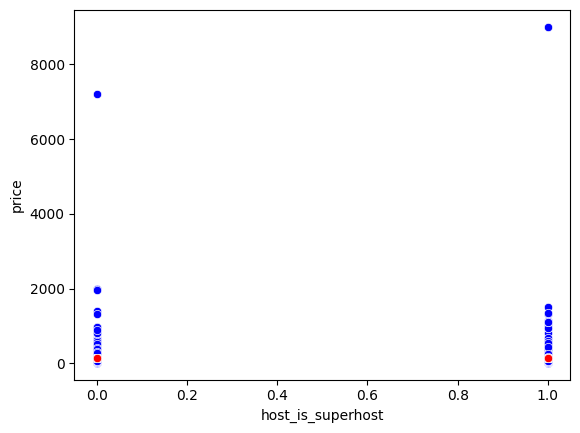

In [19]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones_host_is_superhost', color="red", data=df)

In [20]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model2.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 1.0424716238022214e-06
Correlación: 0.001021014996854709


**accommodates vs bathrooms**


<Axes: xlabel='bathrooms', ylabel='accommodates'>

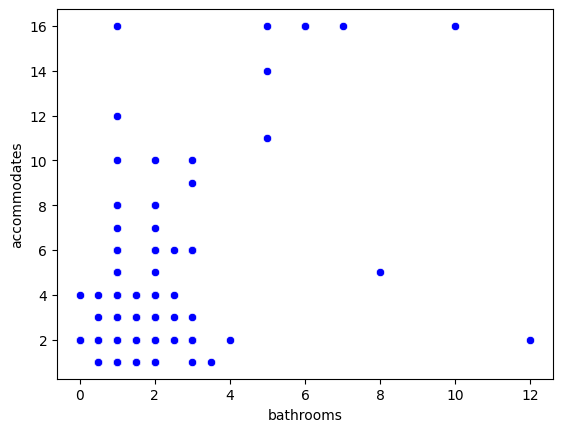

In [21]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [22]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['accommodates']
model3 = LinearRegression()
model3.fit(X=Vars_Indep, y=Vars_Dep)
model3.score(Vars_Indep,Vars_Dep)

0.1771768087483625

In [23]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model3.predict(X=df[['bathrooms']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_bathrooms', y_pred)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

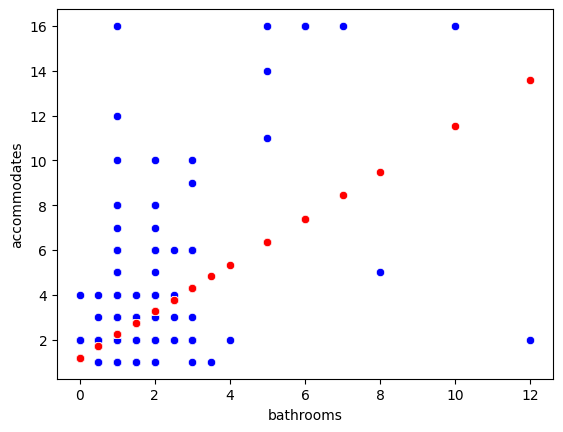

In [24]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones_bathrooms', color="red", data=df)

In [25]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model3.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.1771768087483625
Correlación: 0.4209237564552071


**price vs review_scores_cleanliness**


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

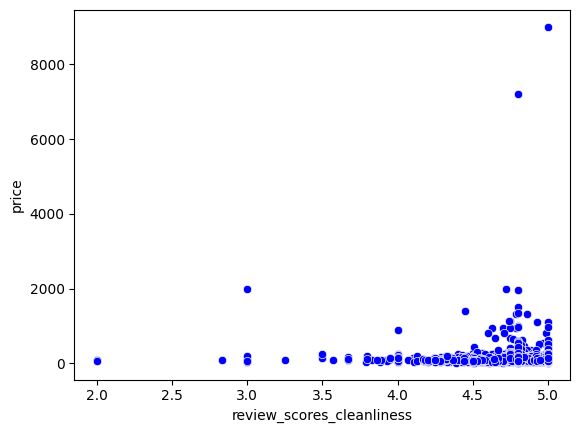

In [26]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [27]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model4 = LinearRegression()
model4.fit(X=Vars_Indep, y=Vars_Dep)
model4.score(Vars_Indep,Vars_Dep)

4.665452790220126e-05

In [28]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model4.predict(X=df[['review_scores_cleanliness']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_review_scores_cleanliness', y_pred)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

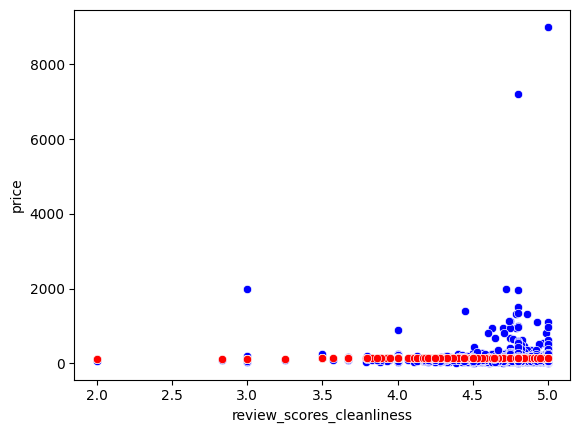

In [29]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_review_scores_cleanliness', color="red", data=df)

In [30]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model4.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 4.665452790220126e-05
Correlación: 0.006830411986271491


**price vs host_identity_verified**


C:\Users\diego\AppData\Local\Temp\ipykernel_8252\1167548800.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['host_identity_verified'] = df['host_identity_verified'].fillna(method='ffill')


<Axes: xlabel='host_identity_verified', ylabel='price'>

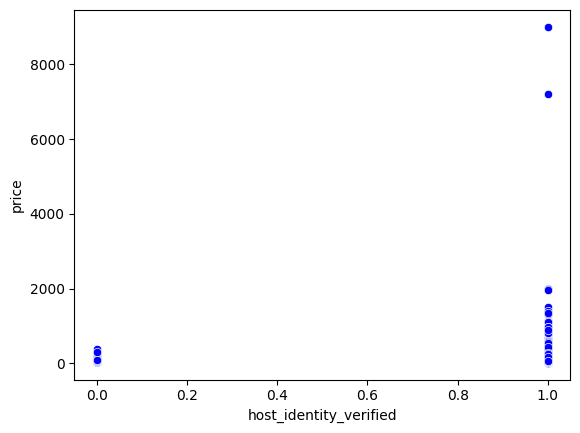

In [31]:
df['host_identity_verified'] = df['host_identity_verified'].fillna(method='ffill')
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False, 'Sin identificar': False})
df['host_identity_verified'] = df['host_identity_verified'].astype(int)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)

In [32]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model5 = LinearRegression()
model5.fit(X=Vars_Indep, y=Vars_Dep)
model5.score(Vars_Indep,Vars_Dep)

4.722411314539432e-05

In [33]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model5.predict(X=df[['host_identity_verified']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_identity_verifieds', y_pred)

<Axes: xlabel='host_identity_verified', ylabel='price'>

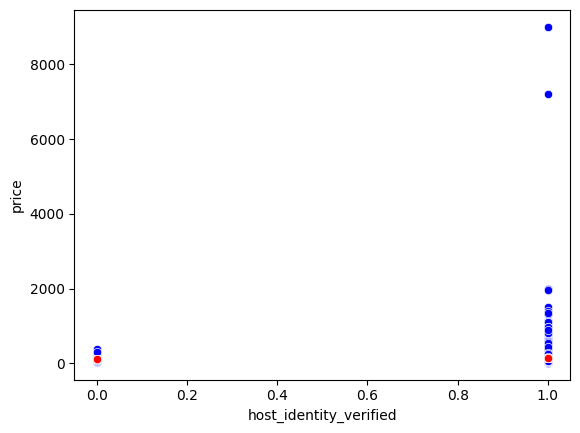

In [34]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Predicciones_host_identity_verifieds', color="red", data=df)

In [35]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model5.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 4.722411314539432e-05
Correlación: 0.0068719802928554966


**price vs instant_bookable**

<Axes: xlabel='instant_bookable', ylabel='price'>

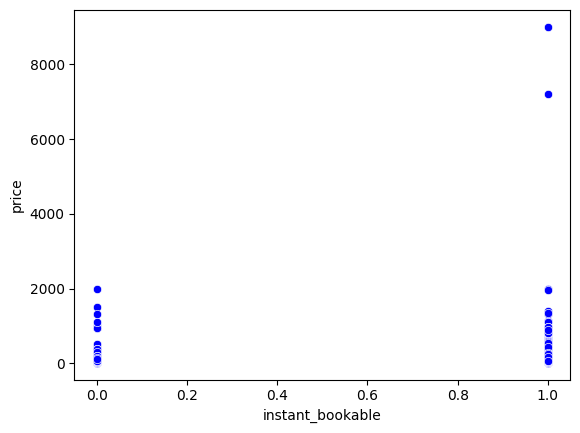

In [36]:
df['instant_bookable']
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].astype(int)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [37]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model6 = LinearRegression()
model6.fit(X=Vars_Indep, y=Vars_Dep)
model6.score(Vars_Indep,Vars_Dep)

0.0011888864747876537

In [38]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model6.predict(X=df[['instant_bookable']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_instant_bookable', y_pred)

<Axes: xlabel='instant_bookable', ylabel='price'>

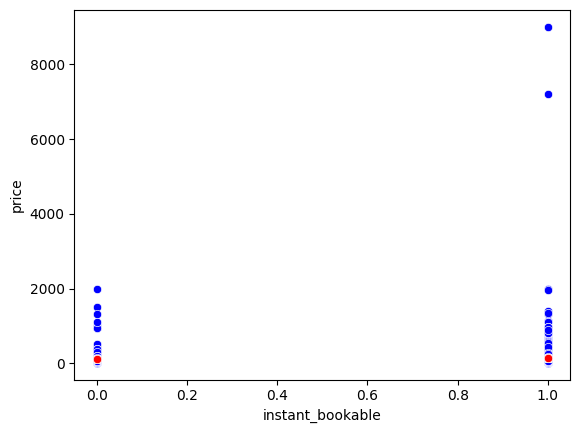

In [39]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones_instant_bookable', color="red", data=df)

In [40]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model6.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.0011888864747876537
Correlación: 0.03448023310228128


**Price vs property_type**


<Axes: xlabel='property_type', ylabel='price'>

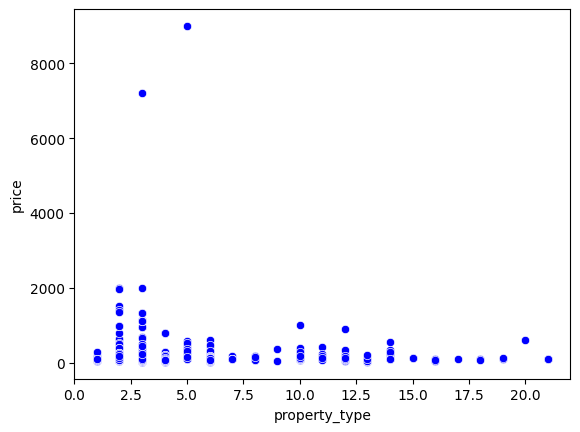

In [41]:
unique_values = df['property_type'].unique()
mapping_dict = {value: index + 1 for index, value in enumerate(unique_values)}
df['property_type'] = df['property_type'].map(mapping_dict)
sns.scatterplot(x='property_type', y='price', color="blue", data=df)

In [42]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['property_type']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model7 = LinearRegression()
model7.fit(X=Vars_Indep, y=Vars_Dep)
model7.score(Vars_Indep,Vars_Dep)

1.0705111310738147e-06

In [43]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model7.predict(X=df[['property_type']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_property_type', y_pred)

<Axes: xlabel='property_type', ylabel='price'>

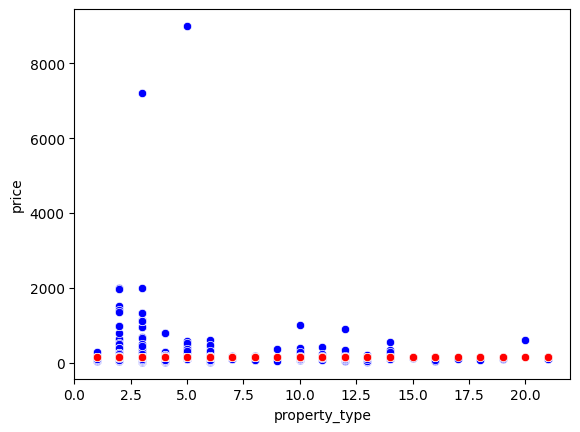

In [44]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type', y='price', color="blue", data=df)
sns.scatterplot(x='property_type', y='Predicciones_property_type', color="red", data=df)

In [45]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model7.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 1.0705111310738147e-06
Correlación: 0.001034655078310552
